In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../../May/Week7/data/acs2015_county_data.csv')

In [3]:
df.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


# Lyrical staff

1. Predict Unemployment
2. drop state and county info
3. columns from totalpop to childpoverty
4. gender - calculate a percentage and drop one

In [5]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [23]:
df.dropna(inplace=True)

In [33]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [24]:
df1=df.loc[:,'TotalPop':'ChildPoverty'].copy()

In [26]:
df1.Women=df1.eval('Women/TotalPop')

In [27]:
df1.drop('Men',axis=1,inplace=True)
df1.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty
0,55221,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,40725,51281.0,2391.0,24974,1080,12.9,18.6
1,195121,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,147695,50254.0,1263.0,27317,711,13.4,19.2
2,26932,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,20714,32964.0,2973.0,16824,798,26.7,45.3
3,22604,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,17495,38678.0,3995.0,18431,1618,16.8,27.9
4,57710,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,42345,45813.0,3141.0,20532,708,16.7,27.2


In [28]:
df1.Citizen=df1.eval('Citizen/TotalPop')

In [29]:
y=df.Unemployment

In [30]:
y.head()

0     7.6
1     7.5
2    17.6
3     8.3
4     7.7
Name: Unemployment, dtype: float64

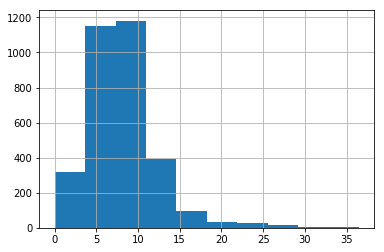

In [31]:
y.hist()

In [20]:
from sklearn.feature_selection import f_regression, chi2, SelectKBest

In [32]:
df1.isna().sum()

TotalPop           0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
dtype: int64

In [34]:
df1.shape

(3218, 15)

In [35]:
y.shape

(3218,)

In [36]:
selection=SelectKBest(chi2,k=6)
X_new=selection.fit_transform(df1,y)

ValueError: Unknown label type: (array([ 7.6,  7.5, 17.6, ..., 25.9, 24.3, 27.1]),)

In [38]:
?chi2 # used to select the best features for classification

Object `chi2 # used to select the best features for classification` not found.


In [50]:
selection=SelectKBest(f_regression,k=6)
X_new=selection.fit_transform(df1,y)

In [51]:
X_new.shape

(3218, 6)

In [52]:
df1.head()

,TotalPop,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty
0,55221,0.515673,2.6,75.8,18.5,0.4,1.0,0.0,0.737491,51281.0,2391.0,24974,1080,12.9,18.6
1,195121,0.511513,4.5,83.1,9.5,0.6,0.7,0.0,0.756941,50254.0,1263.0,27317,711,13.4,19.2
2,26932,0.461718,4.6,46.2,46.7,0.2,0.4,0.0,0.769122,32964.0,2973.0,16824,798,26.7,45.3
3,22604,0.465891,2.2,74.5,21.4,0.4,0.1,0.0,0.773978,38678.0,3995.0,18431,1618,16.8,27.9
4,57710,0.505944,8.6,87.9,1.5,0.3,0.1,0.0,0.733755,45813.0,3141.0,20532,708,16.7,27.2


In [53]:
pd.DataFrame(X_new).head() # White, Black, Income, IncomePerCap, Poverty and ChildPoverty

,0,1,2,3,4,5
0,75.8,18.5,51281.0,24974.0,12.9,18.6
1,83.1,9.5,50254.0,27317.0,13.4,19.2
2,46.2,46.7,32964.0,16824.0,26.7,45.3
3,74.5,21.4,38678.0,18431.0,16.8,27.9
4,87.9,1.5,45813.0,20532.0,16.7,27.2


In [54]:
selection=SelectKBest(f_regression,k=6)
X_new1=selection.fit_transform(df1.drop('Income',axis=1),y)

In [55]:
pd.DataFrame(X_new1).head() # White, Black, Hispanic, IncomePerCap, Poverty and ChildPoverty

,0,1,2,3,4,5
0,2.6,75.8,18.5,24974.0,12.9,18.6
1,4.5,83.1,9.5,27317.0,13.4,19.2
2,4.6,46.2,46.7,16824.0,26.7,45.3
3,2.2,74.5,21.4,18431.0,16.8,27.9
4,8.6,87.9,1.5,20532.0,16.7,27.2


In [46]:
from statsmodels.regression.linear_model import OLS

In [47]:
from statsmodels.tools.tools import add_constant

In [59]:
model1=OLS(y,add_constant(df1))
results1=model1.fit()
results1.summary()

C:\Users\eldiy\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     295.6
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:15:31   Log-Likelihood:                -7702.4
No. Observations:                3218   AIC:                         1.544e+04
Df Residuals:                    3202   BIC:                         1.553e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8581      3.599     -2.461      0.014     -15.915      -1.801
TotalPop         5.268e-07   1.77e-07      2.975      0.003     1.8e-07    8.74e-07
Women               9.0743      2.225      4.078      0.000       4.711      13.437
Hispanic            0.0154      0.033      0.474      0.636      -0.048       0.079
White              -0.0170      0.033     -0.518      0.604      -0.081       0.047
Black               0.0420      0.033      1.284      0.199      -0.022       0.106
Native              0.0708      0.036      1.993      0.046       0.001       0.140
Asian               0.0252      0.045      0.559      0.576      -0.063       0.114
Pacific            -0.0116      0.159     -0.073      0.942      -0.324       0.301
Citizen            13.4255      1.242     10.810      0.000      10.990      15.861
Income           7.186e-05   1.11e-05      6.471      0.000    5.01e-05    9.36e-05
IncomeErr          -0.0001   3.55e-05     -3.293      0.001      -0.000   -4.73e-05
IncomePerCap       -0.0002    2.2e-05     -7.837      0.000      -0.000      -0.000
IncomePerCapErr    -0.0003   7.09e-05     -3.793      0.000      -0.000      -0.000
Poverty             0.2319      0.019     11.968      0.000       0.194       0.270
ChildPoverty        0.0161      0.012      1.340      0.180      -0.007       0.040
==============================================================================
Omnibus:                      279.565   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1526.847
Skew:                           0.207   Prob(JB):                         0.00
Kurtosis:                       6.349   Cond. No.                     2.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
model2=OLS(y,add_constant(X_new))
results2=model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     629.8
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:15:16   Log-Likelihood:                -7849.1
No. Observations:                3218   AIC:                         1.571e+04
Df Residuals:                    3211   BIC:                         1.575e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4399      0.686      5.011      0.000       2.094       4.786
x1            -0.0140      0.003     -4.271      0.000      -0.020      -0.008
x2             0.0346      0.004      8.519      0.000       0.027       0.043
x3          6.049e-05   9.61e-06      6.295      0.000    4.16e-05    7.93e-05
x4            -0.0001   1.81e-05     -6.610      0.000      -0.000   -8.42e-05
x5             0.2928      0.019     15.180      0.000       0.255       0.331
x6             0.0153      0.012      1.245      0.213      -0.009       0.040
==============================================================================
Omnibus:                      233.237   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1121.042
Skew:                           0.141   Prob(JB):                    3.70e-244
Kurtosis:                       5.878   Cond. No.                     7.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model3=OLS(y,add_constant(X_new1))
results3=model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     636.4
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:15:28   Log-Likelihood:                -7840.0
No. Observations:                3218   AIC:                         1.569e+04
Df Residuals:                    3211   BIC:                         1.574e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5977      0.796     12.054      0.000       8.036      11.159
x1            -0.0469      0.006     -7.620      0.000      -0.059      -0.035
x2            -0.0608      0.006    -10.286      0.000      -0.072      -0.049
x3            -0.0080      0.007     -1.230      0.219      -0.021       0.005
x4         -4.846e-05   1.26e-05     -3.841      0.000   -7.32e-05   -2.37e-05
x5             0.2681      0.019     14.292      0.000       0.231       0.305
x6             0.0061      0.012      0.498      0.619      -0.018       0.030
==============================================================================
Omnibus:                      201.176   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              849.105
Skew:                           0.118   Prob(JB):                    4.16e-185
Kurtosis:                       5.505   Cond. No.                     4.04e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
from sklearn.linear_model import Ridge

In [76]:
model4=Ridge(alpha=5)

In [77]:
model4.fit(df1,y)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
model4.coef_

array([ 4.05880027e-07,  1.47290263e+00,  4.22486870e-03, -1.74131093e-02,
        3.76820562e-02,  5.77359253e-02, -7.96188628e-03,  2.00360227e-02,
        6.13666307e+00,  4.37920714e-05, -1.25425754e-04, -1.08165852e-04,
       -3.28337200e-04,  2.61942765e-01,  6.10534723e-03])

In [79]:
model4.intercept_

0.22989471503733316

In [80]:
model4.score(df1,y)

0.5754721264284771

In [73]:
pd.DataFrame([df1.columns,np.round(model4.coef_,2)]).T

,0,1
0,TotalPop,0
1,Women,4.83
2,Hispanic,0.01
3,White,-0.02
4,Black,0.04
5,Native,0.07
6,Asian,0.01
7,Pacific,-0
8,Citizen,10.7
9,Income,0


In [81]:
pd.DataFrame([df1.columns,np.round(model4.coef_,2)]).T

,0,1
0,TotalPop,0
1,Women,1.47
2,Hispanic,0
3,White,-0.02
4,Black,0.04
5,Native,0.06
6,Asian,-0.01
7,Pacific,0.02
8,Citizen,6.14
9,Income,0


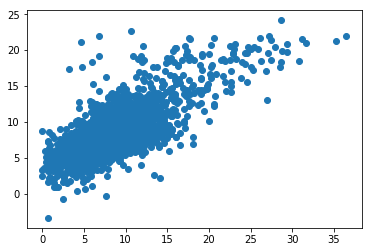

In [87]:
y_hat=model4.predict(df1)
pd.DataFrame([y,y_hat]).T
plt.scatter(y,y_hat)

In [88]:
from sklearn.linear_model import Lasso

In [94]:
model5=Lasso(alpha=1)

In [95]:
model5.fit(df1,y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
model5.intercept_

8.752656383248876

In [97]:
model5.coef_

array([ 2.15244546e-07,  0.00000000e+00, -4.06553601e-03, -2.72996903e-02,
        2.42238013e-02,  2.79646885e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.40698051e-06, -1.31730946e-04, -8.23456752e-05,
       -3.77659287e-04,  2.01761391e-01,  1.61099194e-02])

In [93]:
pd.DataFrame([df1.columns,np.round(model5.coef_,2)]).T

,0,1
0,TotalPop,0
1,Women,0
2,Hispanic,0.01
3,White,-0.02
4,Black,0.04
5,Native,0.06
6,Asian,-0
7,Pacific,-0
8,Citizen,9.02
9,Income,0


In [98]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.feature_selection import RFE

In [108]:
reg=LassoCV()
reg.fit(df1,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(df1,y)}')

best alpha is 39.616087326667376
best score is 0.3573384509102522


C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [109]:
coef=pd.Series(reg.coef_,index=df1.columns)

In [110]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 5 variables and eliminated the other 10 variables


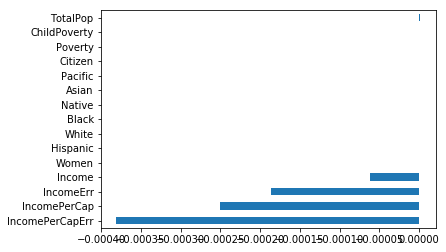

In [113]:
coef.sort_values().plot.barh()

In [114]:
df1.Income.mean()

46123.61653200746

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler=StandardScaler()
scaler.fit(df1)

C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [118]:
scaler.mean_

array([9.94710665e+04, 4.99902954e-01, 1.10060286e+01, 7.54512430e+01,
       8.67088254e+00, 1.72060286e+00, 1.22324425e+00, 7.18147918e-02,
       7.47194490e-01, 4.61236165e+04, 2.84820199e+03, 2.39741016e+04,
       1.35870696e+03, 1.74904288e+01, 2.41883157e+01])

In [122]:
df2=pd.DataFrame(scaler.transform(df1), columns=df1.columns)

C:\Users\eldiy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


best alpha is 0.05094924840914021
best score is 0.5736639571337518


C:\Users\eldiy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


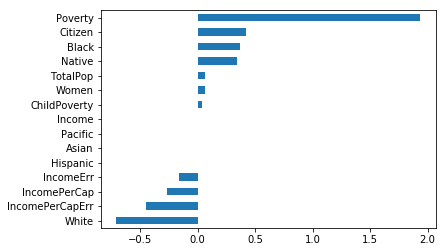

In [128]:
reg=LassoCV()
reg.fit(df2,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(df2,y)}')
coef=pd.Series(reg.coef_,index=df2.columns)
coef.sort_values().plot.barh()

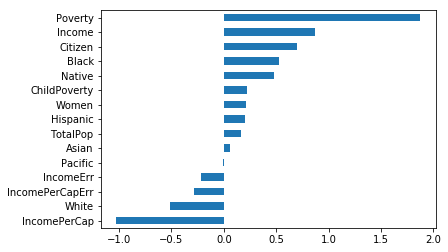

In [130]:
coef=pd.Series(reg.coef_,index=df2.columns)
coef.sort_values().plot.barh()

In [105]:
reg=RidgeCV()
reg.fit(df1,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(df1,y)}')

best alpha is 0.1
best score is 0.5762796172720558


In [129]:
reg=RidgeCV()
reg.fit(df2,y)
print(f'best alpha is {reg.alpha_}')
print(f'best score is {reg.score(df2,y)}')

best alpha is 10.0
best score is 0.5806216453030291
